In [1]:
import mwclient
import time

site = mwclient.Site("en.wikipedia.org")
page = site.pages["Bitcoin"]

In [2]:
revs = list(page.revisions())

In [3]:
revs[0]

OrderedDict([('revid', 1151233254),
             ('parentid', 1149274508),
             ('minor', ''),
             ('user', 'Rodw'),
             ('timestamp',
              time.struct_time(tm_year=2023, tm_mon=4, tm_mday=22, tm_hour=18, tm_min=46, tm_sec=9, tm_wday=5, tm_yday=112, tm_isdst=-1)),
             ('comment',
              'Disambiguating links to [[Central American University]] (link changed to [[Central American University (San Salvador)]]) using [[User:Qwertyytrewqqwerty/DisamAssist|DisamAssist]].')])

In [4]:
revs = sorted(revs, key=lambda rev: rev["timestamp"])

In [5]:
revs[0]

OrderedDict([('revid', 275832581),
             ('parentid', 0),
             ('user', 'Pratyeka'),
             ('timestamp',
              time.struct_time(tm_year=2009, tm_mon=3, tm_mday=8, tm_hour=16, tm_min=41, tm_sec=7, tm_wday=6, tm_yday=67, tm_isdst=-1)),
             ('comment', 'creation (stub)')])

In [6]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def find_sentiment(text):
    sent = sentiment_pipeline([text[:250]])[0]
    score = sent["score"]
    if sent["label"] == "NEGATIVE":
        score *= -1
    return score

C:\Users\DELL\anaconda3\lib\site-packages\h5py\__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layer

In [7]:
find_sentiment("I feel neutral about you")

-0.9937905669212341

In [8]:
edits = {}

for rev in revs:
    date = time.strftime("%y-%m-%d", rev["timestamp"])
    
    if date not in edits:
        edits[date] = dict(sentiments=list(), edit_count=0)
        
        
    edits[date]["edit_count"] += 1
        
#     comment = rev["comment"]
    comment = rev.get("comment", "")
    edits[date]["sentiments"].append(find_sentiment(comment))

In [9]:
from statistics import mean

for key in edits:
    if len(edits[key]["sentiments"]) > 0:
        edits[key]["sentiment"] = mean(edits[key]["sentiments"])
        edits[key]["neg_sentiment"] = len([s for s in edits[key]["sentiments"] if s < 0]) / len(edits[key]["sentiments"])
    else:
        edits[key]["sentiment"] = 0
        edits[key]["neg_sentiment"] = 0
        
    del edits[key]["sentiments"]

In [10]:
edits

{'09-03-08': {'edit_count': 4,
  'sentiment': -0.550525039434433,
  'neg_sentiment': 0.75},
 '09-08-05': {'edit_count': 1,
  'sentiment': 0.7481209635734558,
  'neg_sentiment': 0.0},
 '09-08-06': {'edit_count': 2,
  'sentiment': 0.995745837688446,
  'neg_sentiment': 0.0},
 '09-08-14': {'edit_count': 1,
  'sentiment': 0.9300214052200317,
  'neg_sentiment': 0.0},
 '09-10-13': {'edit_count': 2,
  'sentiment': -0.22749841213226318,
  'neg_sentiment': 0.5},
 '09-11-18': {'edit_count': 1,
  'sentiment': 0.8839512467384338,
  'neg_sentiment': 0.0},
 '09-12-08': {'edit_count': 1,
  'sentiment': -0.9869275689125061,
  'neg_sentiment': 1.0},
 '09-12-17': {'edit_count': 1,
  'sentiment': -0.9975171089172363,
  'neg_sentiment': 1.0},
 '10-02-23': {'edit_count': 1,
  'sentiment': -0.9994946718215942,
  'neg_sentiment': 1.0},
 '10-03-18': {'edit_count': 1,
  'sentiment': 0.875878095626831,
  'neg_sentiment': 0.0},
 '10-04-13': {'edit_count': 4,
  'sentiment': 0.844355896115303,
  'neg_sentiment': 0.

In [11]:
import pandas as pd

edits_df = pd.DataFrame.from_dict(edits, orient="index")

In [12]:
edits_df

,edit_count,sentiment,neg_sentiment
09-03-08,4,-0.550525,0.75
09-08-05,1,0.748121,0.00
09-08-06,2,0.995746,0.00
09-08-14,1,0.930021,0.00
09-10-13,2,-0.227498,0.50
...,...,...,...
23-03-29,1,-0.999457,1.00
23-03-30,1,-0.997922,1.00
23-04-03,1,-0.996604,1.00
23-04-11,2,0.000964,0.50


In [13]:
edits_df.index = pd.to_datetime(edits_df.index)

<ipython-input-13-2dd05fc7cf80>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  edits_df.index = pd.to_datetime(edits_df.index)


In [14]:
from datetime import datetime

dates = pd.date_range(start="2009-03-08", end=datetime.today())

In [15]:
dates

DatetimeIndex(['2009-03-08', '2009-03-09', '2009-03-10', '2009-03-11',
               '2009-03-12', '2009-03-13', '2009-03-14', '2009-03-15',
               '2009-03-16', '2009-03-17',
               ...
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26'],
              dtype='datetime64[ns]', length=5163, freq='D')

In [16]:
edits_df = edits_df.reindex(dates, fill_value=0)

In [17]:
edits_df

,edit_count,sentiment,neg_sentiment
2009-03-08,0,0.0,0.0
2009-03-09,0,0.0,0.0
2009-03-10,0,0.0,0.0
2009-03-11,0,0.0,0.0
2009-03-12,0,0.0,0.0
...,...,...,...
2023-04-22,0,0.0,0.0
2023-04-23,0,0.0,0.0
2023-04-24,0,0.0,0.0
2023-04-25,0,0.0,0.0


In [18]:
rolling_edits = edits_df.rolling(30).mean()

In [19]:
rolling_edits

,edit_count,sentiment,neg_sentiment
2009-03-08,NaN,NaN,NaN
2009-03-09,NaN,NaN,NaN
2009-03-10,NaN,NaN,NaN
2009-03-11,NaN,NaN,NaN
2009-03-12,NaN,NaN,NaN
...,...,...,...
2023-04-22,0.6,-0.084758,0.145833
2023-04-23,0.6,-0.084758,0.145833
2023-04-24,0.6,-0.084758,0.145833
2023-04-25,0.6,-0.084758,0.145833


In [20]:
rolling_edits = rolling_edits.dropna()

In [21]:
rolling_edits

,edit_count,sentiment,neg_sentiment
2009-04-06,1.266667,-0.193400,0.233987
2009-04-07,1.266667,-0.193400,0.233987
2009-04-08,1.266667,-0.193400,0.233987
2009-04-09,1.266667,-0.193400,0.233987
2009-04-10,1.266667,-0.193400,0.233987
...,...,...,...
2023-04-22,0.600000,-0.084758,0.145833
2023-04-23,0.600000,-0.084758,0.145833
2023-04-24,0.600000,-0.084758,0.145833
2023-04-25,0.600000,-0.084758,0.145833


In [22]:
rolling_edits.to_csv("wikipedia_edits.csv")

# DOWNLOADING BITCOIN PRICE DATA

In [23]:
import yfinance as yf
import os
import pandas as pd

In [24]:
btc = yf.download(tickers='BTC-USD', period='20y', interval='1d')


[*********************100%***********************]  1 of 1 completed


In [25]:
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,27276.910156,20759504330
2023-04-22,27265.894531,27872.142578,27169.570312,27817.500000,27817.500000,13125734602
2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,27591.384766,12785446832


In [26]:
btc.index = pd.to_datetime(btc.index)

In [27]:
del btc["Adj Close"]

In [28]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,20759504330
2023-04-22,27265.894531,27872.142578,27169.570312,27817.500000,13125734602
2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,12785446832


In [29]:
btc.columns = [c.lower() for c in btc.columns]  # converting column names to lower case

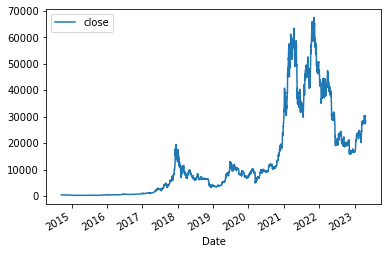

In [30]:
btc.plot.line(y="close", use_index=True)

In [31]:
# Exploratory Data Analysis
# EDA is an approach to analyzing the data using visual techniques. 
# It is used to discover trends, and patterns, or to check assumptions with the help of statistical 
# summaries and graphical representations. 

# While performing the EDA of the Bitcoin Price data we will analyze how prices of the cryptocurrency 
# have moved over the period of time and how the end of the quarters affects the prices of the currency.

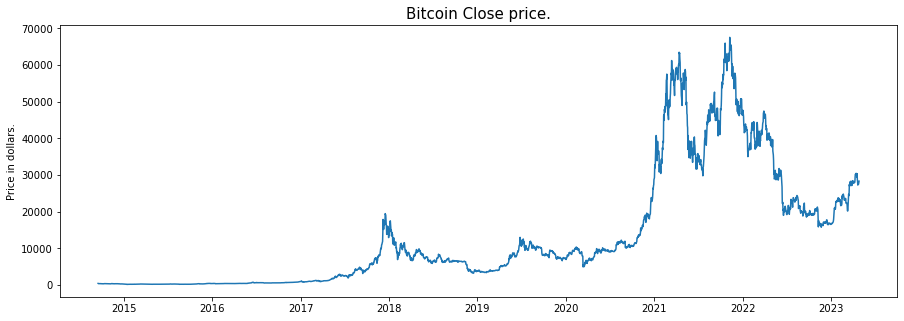

In [32]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(15, 5))
plt.plot(btc['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [33]:
# checking wheather out data contains null values or not
btc.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:177: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, np.float)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:484: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DE

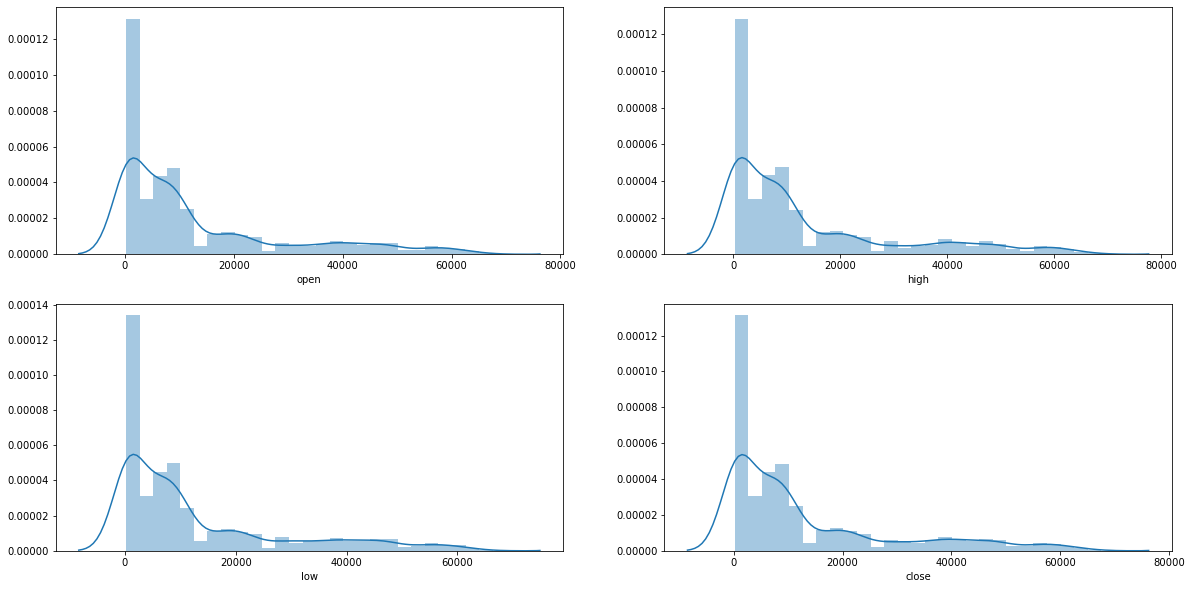

In [34]:
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.distplot(btc[col])
plt.show()


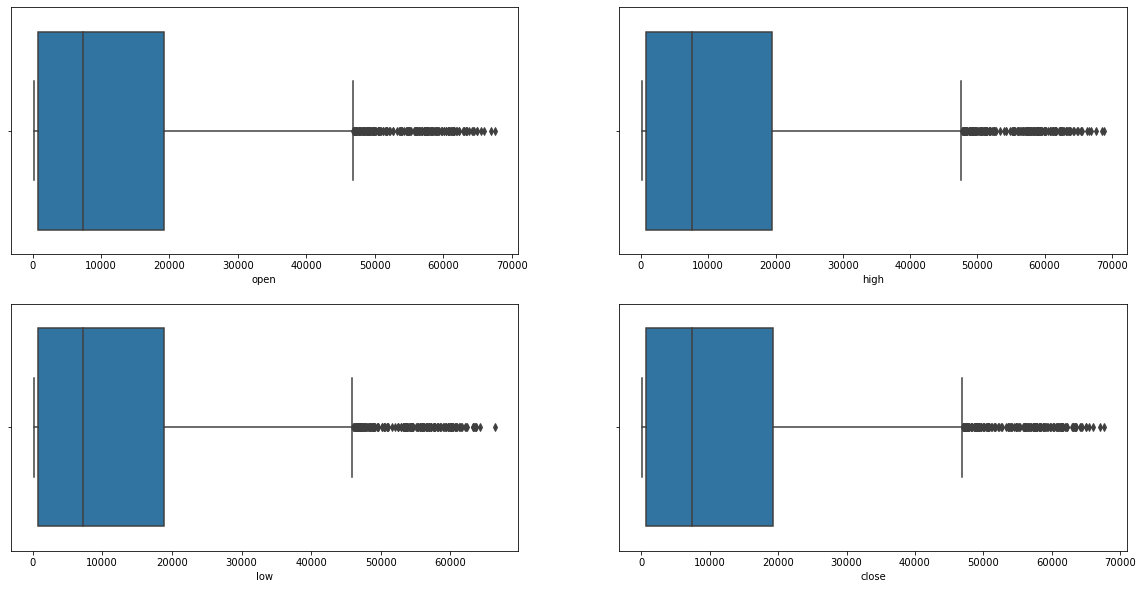

In [35]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(btc[col])
plt.show()
# There are so many outliers in the data which means that the prices of the stock have varied 
# hugely in a very short period of time. Let’s check this with the help of a barplot. 

In [49]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3143 entries, 2014-09-17 to 2023-04-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3143 non-null   float64
 1   high    3143 non-null   float64
 2   low     3143 non-null   float64
 3   close   3143 non-null   float64
 4   volume  3143 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 147.3 KB


In [52]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [61]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,1.266667,-0.193400,0.233987
2009-04-07,1.266667,-0.193400,0.233987
2009-04-08,1.266667,-0.193400,0.233987
2009-04-09,1.266667,-0.193400,0.233987
2009-04-10,1.266667,-0.193400,0.233987
...,...,...,...
2023-04-22,0.600000,-0.084758,0.145833
2023-04-23,0.600000,-0.084758,0.145833
2023-04-24,0.600000,-0.084758,0.145833
2023-04-25,0.600000,-0.084758,0.145833


# PREPARING DATA FOR MACHINE LEARNING

In [62]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [67]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.533333,-0.109741,0.154444
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.566667,-0.142785,0.187778
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.600000,-0.176097,0.221111
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.600000,-0.176097,0.221111
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.600000,-0.109894,0.187778
...,...,...,...,...,...,...,...,...
2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,20759504330,0.700000,-0.117651,0.179167
2023-04-22,27265.894531,27872.142578,27169.570312,27817.500000,13125734602,0.600000,-0.084758,0.145833
2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,12785446832,0.600000,-0.084758,0.145833
2023-04-24,27591.730469,27979.982422,27070.849609,27525.339844,17703288330,0.600000,-0.084758,0.145833


In [68]:
btc["tomorrow"] = btc["close"].shift(-1)

In [69]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.533333,-0.109741,0.154444,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.566667,-0.142785,0.187778,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.600000,-0.176097,0.221111,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.600000,-0.176097,0.221111,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.600000,-0.109894,0.187778,402.152008
...,...,...,...,...,...,...,...,...,...
2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,20759504330,0.700000,-0.117651,0.179167,27817.500000
2023-04-22,27265.894531,27872.142578,27169.570312,27817.500000,13125734602,0.600000,-0.084758,0.145833,27591.384766
2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,12785446832,0.600000,-0.084758,0.145833,27525.339844
2023-04-24,27591.730469,27979.982422,27070.849609,27525.339844,17703288330,0.600000,-0.084758,0.145833,28349.996094


In [70]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [71]:
btc["target"].value_counts()

target
1    1672
0    1471
Name: count, dtype: int64

In [72]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.533333,-0.109741,0.154444,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.566667,-0.142785,0.187778,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.600000,-0.176097,0.221111,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.600000,-0.176097,0.221111,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.600000,-0.109894,0.187778,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,20759504330,0.700000,-0.117651,0.179167,27817.500000,1
2023-04-22,27265.894531,27872.142578,27169.570312,27817.500000,13125734602,0.600000,-0.084758,0.145833,27591.384766,0
2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,12785446832,0.600000,-0.084758,0.145833,27525.339844,0
2023-04-24,27591.730469,27979.982422,27070.849609,27525.339844,17703288330,0.600000,-0.084758,0.145833,28349.996094,1


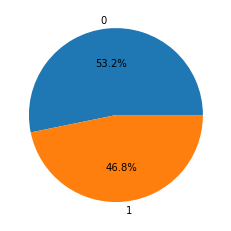

In [73]:
# I have added the target feature which is a signal whether to buy or not we will train our model to predict this only.
# But before proceeding let’s check whether the target is balanced or not using a pie chart.
plt.pie(btc['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\matrix.py:68: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape, np.bool)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\matrix.py:78: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.bool)


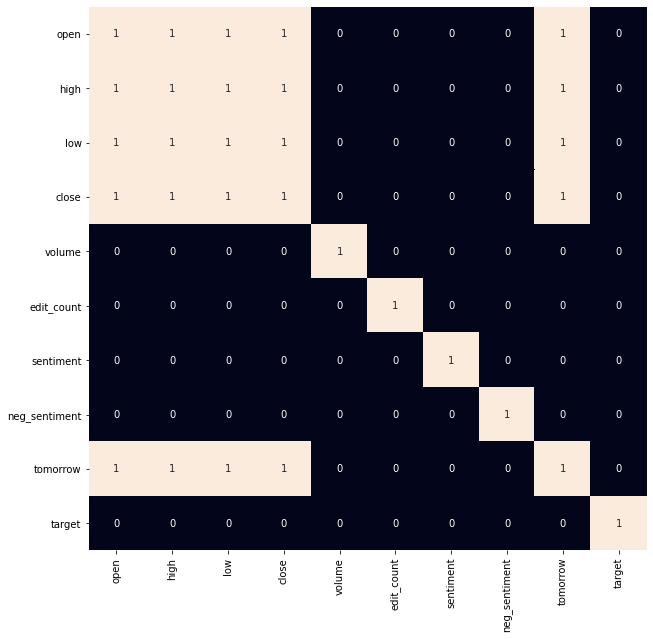

In [74]:
# When we add features to our dataset we have to ensure that there are no highly correlated features 
# as they do not help in the learning process of the algorithm.
plt.figure(figsize=(10, 10))
sb.heatmap(btc.corr() > 0.9, annot=True, cbar=False)
plt.show()
# From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious,
# and the added features are not highly correlated with each other or previously provided features
# which means that we are good to go and build our model.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:270: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  none_na = np.zeros(len(data), np.bool)


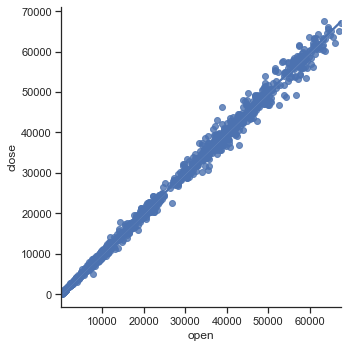

In [80]:
sb.set(style="ticks")
sb.lmplot(x="open", y="close", data=btc)

# TRAINING OUR BASELINE ML MODEL

In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


RandomForestClassifier(min_samples_split=50, random_state=1)

In [82]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)


0.5357142857142857

# EVALUAING ERROR WITH BACKTESTING


In [83]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined
    

In [84]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

# USING AN XGBOOST MODEL

In [85]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

predictions

,target,predictions
2017-09-16,0,0
2017-09-17,1,0
2017-09-18,0,1
2017-09-19,0,0
2017-09-20,0,0
...,...,...
2023-04-21,1,0
2023-04-22,0,0
2023-04-23,0,0
2023-04-24,1,0


In [86]:
precision_score(predictions["target"], predictions["predictions"])

0.5286738351254481

# IMPROVING PRCISION WITH TRENDS

In [87]:
def compute_rolling(btc):
    horizons = [2, 7, 60, 365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]
    
    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()
        
        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]
        
        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]
        
        new_predictors += [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [88]:
btc, new_predictors = compute_rolling(btc.copy())

In [89]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.533333,-0.109741,0.154444,424.440002,0,...,NaN,1.000000,0.533333,NaN,1.000000,0.533333,NaN,1.000000,0.533333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.566667,-0.142785,0.187778,394.795990,0,...,0.0,0.962696,0.550000,0.000000,0.962696,0.550000,0.000000,0.962696,0.550000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.600000,-0.176097,0.221111,408.903992,1,...,0.0,0.927789,0.566667,0.000000,0.927789,0.566667,0.000000,0.927789,0.566667,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.600000,-0.176097,0.221111,398.821014,0,...,0.5,0.970419,0.575000,0.333333,0.970419,0.575000,0.333333,0.970419,0.575000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.600000,-0.109894,0.187778,402.152008,1,...,0.5,0.956729,0.580000,0.250000,0.956729,0.580000,0.250000,0.956729,0.580000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21,28249.230469,28349.968750,27177.365234,27276.910156,20759504330,0.700000,-0.117651,0.179167,27817.500000,1,...,0.0,0.932216,0.666667,0.142857,1.038110,1.554444,0.433333,1.191986,1.514247,0.465753
2023-04-22,27265.894531,27872.142578,27169.570312,27817.500000,13125734602,0.600000,-0.084758,0.145833,27591.384766,0,...,0.5,0.962443,0.661905,0.285714,1.056418,1.545556,0.450000,1.217347,1.514247,0.468493
2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,12785446832,0.600000,-0.084758,0.145833,27525.339844,0,...,0.5,0.967648,0.652381,0.285714,1.045579,1.536667,0.450000,1.209176,1.514155,0.468493
2023-04-24,27591.730469,27979.982422,27070.849609,27525.339844,17703288330,0.600000,-0.084758,0.145833,28349.996094,1,...,0.0,0.974706,0.642857,0.285714,1.040725,1.527222,0.450000,1.208014,1.514064,0.468493


In [94]:
predictions = backtest(btc, model, new_predictors)

In [95]:
precision_score(predictions["target"], predictions["predictions"])

0.5211406096361848

# GENERATING FUTURE PREDICTIONS

In [92]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-04-21,1,1
2023-04-22,0,0
2023-04-23,0,1
2023-04-24,1,1
